In [1]:
import hw6
import importlib
import torch
import numpy as np
import matplotlib.pyplot as plt

In [58]:
!python hw6.py

Epoch: 0  Train Loss: 0.188 | Train Acc: 73.900
Epoch: 1  Train Loss: 0.127 | Train Acc: 79.994
Epoch: 2  Train Loss: 0.115 | Train Acc: 81.994
Epoch: 3  Train Loss: 0.110 | Train Acc: 83.047
Epoch: 4  Train Loss: 0.105 | Train Acc: 84.181
Epoch: 5  Train Loss: 0.099 | Train Acc: 85.772
Epoch: 6  Train Loss: 0.082 | Train Acc: 89.203
Epoch: 7  Train Loss: 0.047 | Train Acc: 95.953
Epoch: 8  Train Loss: 0.018 | Train Acc: 99.909
Epoch: 9  Train Loss: 0.009 | Train Acc: 100.000
Epoch: 10  Train Loss: 0.006 | Train Acc: 100.000
Test Acc: 100.000
Epoch: 11  Train Loss: 0.004 | Train Acc: 100.000
Epoch: 12  Train Loss: 0.003 | Train Acc: 100.000
Epoch: 13  Train Loss: 0.002 | Train Acc: 100.000
Epoch: 14  Train Loss: 0.002 | Train Acc: 100.000
Epoch: 15  Train Loss: 0.002 | Train Acc: 100.000
Epoch: 16  Train Loss: 0.001 | Train Acc: 100.000
Epoch: 17  Train Loss: 0.001 | Train Acc: 100.000
Epoch: 18  Train Loss: 0.001 | Train Acc: 100.000
Epoch: 19  Train Loss: 0.001 | Train Acc: 100.000
E

c:\Users\ziyet\CS 446\HW6\hw6.py:214: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.matshow(model.attention_mat())


25
25


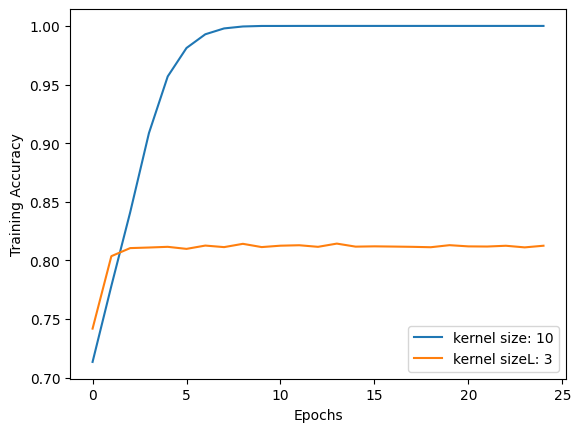

In [70]:
#c
conv10 = [71.338, 77.822, 84.088, 90.856, 95.691, 98.119, 99.287, 99.787, 99.953, 99.997, 99.997, 100.000, 100.000, 100.000, 100.000, 100.000, 100.000, 100.000, 100.000, 100.000, 100.000, 100.000, 100.000, 100.000, 100.000]
print(len(conv10))
conv3 = [74.178, 80.359, 81.047, 81.097, 81.156, 80.981, 81.263, 81.131, 81.412, 81.134, 81.253, 81.291, 81.156, 81.431, 81.172, 81.197, 81.178, 81.156, 81.122, 81.297, 81.194, 81.181, 81.247, 81.109, 81.250]
print(len(conv3))
x = np.array(range(25))
plt.plot(x,np.array(conv10)/100,label='kernel size: 10')
plt.plot(x,np.array(conv3)/100,label='kernel sizeL: 3')
plt.ylabel("Training Accuracy")
plt.xlabel("Epochs")
plt.legend()

25
25


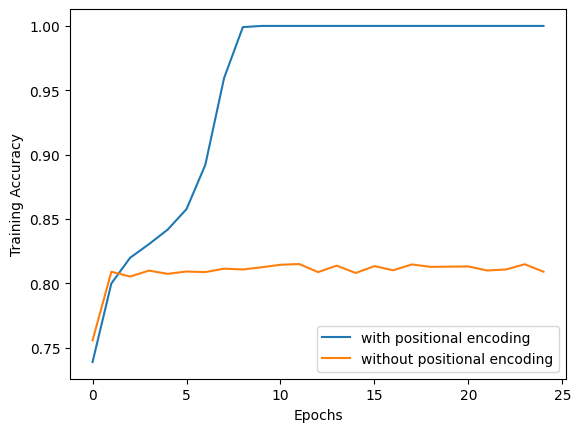

In [71]:
#d
attnpe = [73.900, 79.994, 81.994, 83.047, 84.181, 85.772, 89.203, 95.953, 99.909, 100.000, 100.000, 100.000, 100.000, 100.000, 100.000, 100.000, 100.000, 100.000, 100.000, 100.000, 100.000, 100.000, 100.000, 100.000, 100.000]
print(len(attnpe))
attn = [75.578, 80.903, 80.531, 80.994, 80.744, 80.922, 80.878, 81.144, 81.081, 81.253, 81.447, 81.503, 80.878, 81.378, 80.809, 81.341, 81.019, 81.472, 81.284, 81.300, 81.316, 81.003, 81.081, 81.487, 80.909]
print(len(attn))
x = np.array(range(25))
plt.plot(x,np.array(attnpe)/100,label='with positional encoding')
plt.plot(x,np.array(attn)/100,label='without positional encoding')
plt.ylabel("Training Accuracy")
plt.xlabel("Epochs")
plt.legend()

[[0.   0.   0.   0.02 0.02 0.01 0.   0.01 0.07 0.87]
 [0.   0.   0.   0.02 0.02 0.   0.   0.   0.07 0.89]
 [0.   0.   0.   0.01 0.01 0.   0.   0.   0.05 0.91]
 [0.   0.   0.   0.01 0.01 0.   0.   0.   0.05 0.93]
 [0.01 0.01 0.01 0.01 0.86 0.01 0.01 0.01 0.02 0.03]
 [0.   0.   0.   0.02 0.02 0.   0.   0.   0.05 0.9 ]
 [0.   0.   0.   0.02 0.02 0.   0.   0.   0.06 0.88]
 [0.   0.   0.   0.02 0.02 0.   0.   0.   0.07 0.88]
 [0.   0.   0.   0.02 0.02 0.   0.   0.   0.06 0.89]
 [0.   0.   0.   0.02 0.02 0.   0.   0.   0.05 0.9 ]]


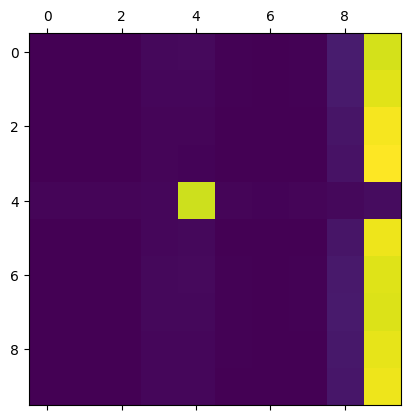

In [78]:
#e
with open('attention.npz', 'rb') as f:
    attention = np.load(f)
with open('attention_mean.npz', 'rb') as f:
    attention_mean = np.load(f)
plt.matshow(attention_mean)
print(np.round(attention_mean,2))

In [2]:
import numpy as np
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import scipy
import scipy.spatial
import matplotlib.pyplot as plt
import hw6_utils as utils
from torch.nn import TransformerEncoder, TransformerEncoderLayer
from torch.utils.data import dataset


device = 'cuda' if torch.cuda.is_available() else 'cpu'
def train(model, epoch, optimizer, criterion, trainloader, log=True):
    model.train()
    train_loss = 0.0
    total_seen = 0
    correct = 0.0
    for batch_idx, inputs in enumerate(trainloader):
        inputs = inputs.float().to(device)
        seq_len = inputs.shape[-1]//2
        X = inputs[:,:seq_len]
        Y = inputs[:,seq_len:]

        model.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, Y)
        loss = loss.mean()
        loss.backward()
        optimizer.step()

        predictions = torch.clip(outputs,0,1)
        predictions = (predictions>0.5).float()
        total_seen += Y.size(0)
        train_loss += loss.item()
        correct += predictions.eq(Y).sum().item()

    accuracy = 100.*correct/(seq_len*total_seen) 
    if log:
        print('Epoch: %d  Train Loss: %.3f | Train Acc: %.3f' % (epoch, train_loss/(batch_idx+1), accuracy))

    return accuracy


def test(model, testloader, log=True):
    model.eval()
    correct = 0.0
    predictions = None
    for batch_idx, inputs in enumerate(testloader):
        inputs = inputs.float().to(device)
        seq_len = inputs.shape[-1]//2
        X = inputs[:,:seq_len]
        Y = inputs[:,seq_len:]
        outputs = model(X)
        predictions = torch.clip(outputs,0,1)
        predictions = (predictions>0.5).float()
        correct += torch.prod(predictions.eq(Y).float(), dim=1).item()

    if log:
        print('Test Acc: %.3f' % (100.*correct/len(testloader)))
    return outputs.detach(), correct



Epoch: 0  Train Loss: 0.188 | Train Acc: 73.900
Epoch: 1  Train Loss: 0.127 | Train Acc: 79.994
Epoch: 2  Train Loss: 0.115 | Train Acc: 81.994
Epoch: 3  Train Loss: 0.110 | Train Acc: 83.047
Epoch: 4  Train Loss: 0.105 | Train Acc: 84.181
Epoch: 5  Train Loss: 0.099 | Train Acc: 85.772
[[0.17 0.07 0.08 0.07 0.09 0.08 0.1  0.1  0.13 0.13]
 [0.07 0.13 0.08 0.07 0.09 0.08 0.09 0.1  0.15 0.14]
 [0.09 0.07 0.14 0.08 0.09 0.07 0.09 0.1  0.13 0.15]
 [0.07 0.07 0.09 0.11 0.09 0.07 0.08 0.1  0.13 0.19]
 [0.09 0.08 0.1  0.08 0.12 0.06 0.09 0.09 0.13 0.14]
 [0.08 0.08 0.08 0.08 0.09 0.11 0.09 0.09 0.14 0.15]
 [0.1  0.08 0.09 0.07 0.1  0.07 0.13 0.1  0.12 0.12]
 [0.08 0.07 0.08 0.09 0.09 0.08 0.1  0.15 0.13 0.13]
 [0.09 0.09 0.09 0.07 0.08 0.08 0.09 0.1  0.18 0.12]
 [0.08 0.06 0.1  0.1  0.09 0.07 0.08 0.09 0.12 0.22]]
Epoch: 6  Train Loss: 0.082 | Train Acc: 89.203
Epoch: 7  Train Loss: 0.047 | Train Acc: 95.953
Epoch: 8  Train Loss: 0.018 | Train Acc: 99.909
Epoch: 9  Train Loss: 0.009 | Train A

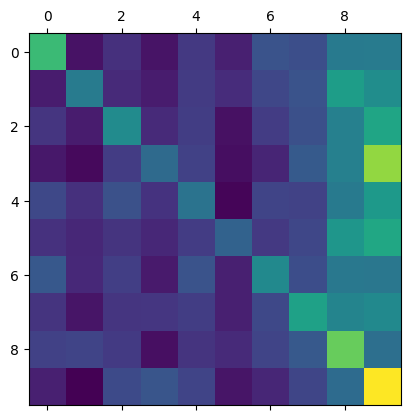

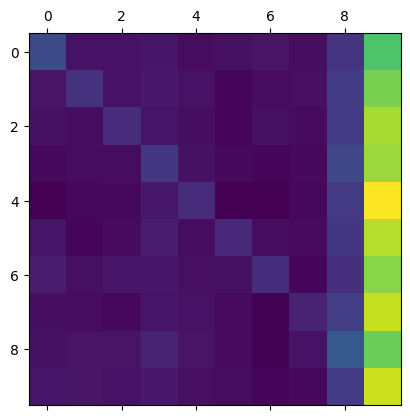

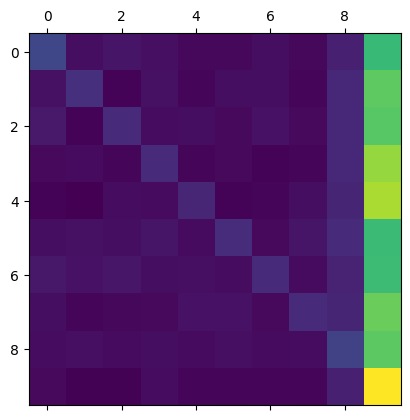

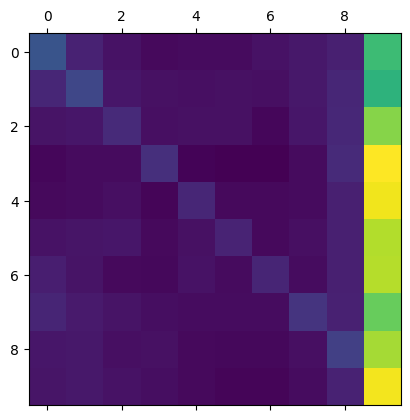

In [8]:
seed_val = 1
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
np.random.seed(seed_val)
random.seed(seed_val)

length = 10
kernel_size = 3
X = utils.load_data()
n = X.shape[0]
model_type = 'Attention'

train_X = X[:int(0.8*n)]
test_X = X[int(0.8*n):]

trainloader = torch.utils.data.DataLoader(train_X, shuffle=True, batch_size=64, num_workers=1)
testloader = torch.utils.data.DataLoader(test_X, shuffle=False, batch_size=1, num_workers=1)


model = hw6.Attention(length=length, positional_encoding=True).to(device) 


optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.MSELoss(reduction="none")

for epoch in range(21):
    train(model, epoch, optimizer, criterion, trainloader)
    if epoch % 5 == 0 and epoch > 0:
        print(np.round(model.attention_mat(),2))
        plt.matshow(model.attention_mat())
    # if epoch % 10 == 0 and epoch > 0:
    #     test(model, testloader)
    